In [1]:
#import libraries
import pandas as pd
import os

In [2]:
#read all the days actual dispatch datasets at once and create a single data frame(2 dataframes are same,but with different shapes)
data_frames_1=[]
data_frames_2=[]
for i in range(0,31):
    if i==3:
        continue
    else:
        df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

        temp=list(df.columns)

        date = temp[8].date()
        df.columns = df.iloc[0]
        df=df.drop(0)
        df=df.drop(columns=df.columns[-3:],axis=1)
        x=df.iloc[:, 0]

        t=0
        for i in x:
            t=t+1
            if i=='Total MW':

                break
        df=df.iloc[:t-1, :]
        df1 = pd.DataFrame()
        import datetime as dt
        t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        for i in range (1,len(df.columns),4):
            df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]+df.iloc[:, i+2]+df.iloc[:, i+3]
            t2 = dt.datetime.strptime('01:00:00', '%H:%M:%S') #make to hourly....
            time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
            x=(t1 - time_zero + t2).time()
            t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
            #print(i)

        m=df.iloc[:t-1, 0]
        list(m)
        df1.insert(0, 'Power_Plant', m)
        df2=pd.melt(df1,id_vars=['Power_Plant'])
        df1['Date']=date
        df2['Date']=date
        print(date)
        data_frames_1.append(df1)
        data_frames_2.append(df2)

2020-07-01
2020-07-03
2020-07-03
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11
2020-07-12
2020-07-13
2020-07-14
2020-07-15
2020-07-16
2020-07-17
2020-07-18
2020-07-19
2020-07-20
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31


In [3]:
data_frames_1[0].head() #hourly.... in first sheet...

,Power_Plant,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Date
1,Canyon,40.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,22.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,90.0,0.0,2020-07-01
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,85.0,40.0,40.0,40.0,20.0,0.0,0.0,0.0,2020-07-01
3,Olax,20.0,20.0,20.0,20.0,100.0,148.0,113.0,94.0,186.0,...,124.0,123.0,120.0,163.0,207.0,70.0,56.0,56.0,56.0,2020-07-01
4,Nlax,130.0,53.0,42.0,90.0,118.0,225.0,273.0,127.0,235.0,...,420.0,422.0,238.0,277.0,424.0,420.0,204.0,129.0,130.0,2020-07-01
5,Polp,79.0,77.0,90.0,88.0,85.0,152.0,309.0,143.0,95.0,...,203.0,263.0,320.0,239.0,360.0,319.0,192.0,91.0,83.0,2020-07-01


In [4]:
data_frames_2[0].head()

,Power_Plant,variable,value,Date
0,Canyon,00:00:00,40.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,20.0,2020-07-01
3,Nlax,00:00:00,130.0,2020-07-01
4,Polp,00:00:00,79.0,2020-07-01


# Hourly

In [5]:
df=data_frames_1[0].drop('Date',axis=1)

In [6]:
df.head()

,Power_Plant,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
1,Canyon,40.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,22.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,90.0,0.0
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,85.0,40.0,40.0,40.0,20.0,0.0,0.0,0.0
3,Olax,20.0,20.0,20.0,20.0,100.0,148.0,113.0,94.0,186.0,...,124.0,124.0,123.0,120.0,163.0,207.0,70.0,56.0,56.0,56.0
4,Nlax,130.0,53.0,42.0,90.0,118.0,225.0,273.0,127.0,235.0,...,348.0,420.0,422.0,238.0,277.0,424.0,420.0,204.0,129.0,130.0
5,Polp,79.0,77.0,90.0,88.0,85.0,152.0,309.0,143.0,95.0,...,240.0,203.0,263.0,320.0,239.0,360.0,319.0,192.0,91.0,83.0


In [7]:
data_frames_1[0].head()

,Power_Plant,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Date
1,Canyon,40.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,22.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,90.0,0.0,2020-07-01
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,85.0,40.0,40.0,40.0,20.0,0.0,0.0,0.0,2020-07-01
3,Olax,20.0,20.0,20.0,20.0,100.0,148.0,113.0,94.0,186.0,...,124.0,123.0,120.0,163.0,207.0,70.0,56.0,56.0,56.0,2020-07-01
4,Nlax,130.0,53.0,42.0,90.0,118.0,225.0,273.0,127.0,235.0,...,420.0,422.0,238.0,277.0,424.0,420.0,204.0,129.0,130.0,2020-07-01
5,Polp,79.0,77.0,90.0,88.0,85.0,152.0,309.0,143.0,95.0,...,203.0,263.0,320.0,239.0,360.0,319.0,192.0,91.0,83.0,2020-07-01


In [8]:
x=df.iloc[0,:]
x

Power_Plant    Canyon
00:00:00         40.0
01:00:00         40.0
02:00:00         40.0
03:00:00          0.0
04:00:00          0.0
05:00:00          0.0
06:00:00          0.0
07:00:00          0.0
08:00:00         22.0
09:00:00         44.0
10:00:00        101.0
11:00:00        120.0
12:00:00        120.0
13:00:00        120.0
14:00:00        120.0
15:00:00        120.0
16:00:00        120.0
17:00:00        120.0
18:00:00        120.0
19:00:00        120.0
20:00:00        120.0
21:00:00        120.0
22:00:00         90.0
23:00:00          0.0
Name: 1, dtype: object

In [9]:
x=x.drop('Power_Plant')

In [10]:
x

00:00:00     40.0
01:00:00     40.0
02:00:00     40.0
03:00:00      0.0
04:00:00      0.0
05:00:00      0.0
06:00:00      0.0
07:00:00      0.0
08:00:00     22.0
09:00:00     44.0
10:00:00    101.0
11:00:00    120.0
12:00:00    120.0
13:00:00    120.0
14:00:00    120.0
15:00:00    120.0
16:00:00    120.0
17:00:00    120.0
18:00:00    120.0
19:00:00    120.0
20:00:00    120.0
21:00:00    120.0
22:00:00     90.0
23:00:00      0.0
Name: 1, dtype: object

In [11]:
df1 = x.to_frame().reset_index()  
# show the dataframe
df1.head()

,index,1
0,00:00:00,40.0
1,01:00:00,40.0
2,02:00:00,40.0
3,03:00:00,0.0
4,04:00:00,0.0


In [12]:
df1=df1.rename(columns = {'index':'Time',1:'Dispatch'}) #renaming...
df1.head()

,Time,Dispatch
0,00:00:00,40.0
1,01:00:00,40.0
2,02:00:00,40.0
3,03:00:00,0.0
4,04:00:00,0.0


In [13]:
date=data_frames_2[0].iloc[0,3]
date

datetime.date(2020, 7, 1)

In [14]:
df1['date']=date

In [15]:
df1.head()

,Time,Dispatch,date
0,00:00:00,40.0,2020-07-01
1,01:00:00,40.0,2020-07-01
2,02:00:00,40.0,2020-07-01
3,03:00:00,0.0,2020-07-01
4,04:00:00,0.0,2020-07-01


In [16]:
df1['ConvertedDate']=df1['date'].astype(str) #not working..(try another way below)

In [17]:
df1.dtypes

Time             object
Dispatch         object
date             object
ConvertedDate    object
dtype: object

In [18]:
df1['date'] = df1['date'].astype("string") #change the data type

In [19]:
df1.dtypes

Time             object
Dispatch         object
date             string
ConvertedDate    object
dtype: object

In [20]:
df1['Date-Time']=df1['date'] + ' ' + df1['Time'] #combine date and the time..

In [21]:
df1.head()

,Time,Dispatch,date,ConvertedDate,Date-Time
0,00:00:00,40.0,2020-07-01,2020-07-01,2020-07-01 00:00:00
1,01:00:00,40.0,2020-07-01,2020-07-01,2020-07-01 01:00:00
2,02:00:00,40.0,2020-07-01,2020-07-01,2020-07-01 02:00:00
3,03:00:00,0.0,2020-07-01,2020-07-01,2020-07-01 03:00:00
4,04:00:00,0.0,2020-07-01,2020-07-01,2020-07-01 04:00:00


In [22]:
df1['Date-Time'] = pd.to_datetime(df1['Date-Time'])

In [23]:
df1.dtypes

Time                     object
Dispatch                 object
date                     string
ConvertedDate            object
Date-Time        datetime64[ns]
dtype: object

In [24]:
df2=df1[['Date-Time','Dispatch']] #select only needed columns.

In [25]:
df2.head()

,Date-Time,Dispatch
0,2020-07-01 00:00:00,40.0
1,2020-07-01 01:00:00,40.0
2,2020-07-01 02:00:00,40.0
3,2020-07-01 03:00:00,0.0
4,2020-07-01 04:00:00,0.0


In [26]:
df2.dtypes

Date-Time    datetime64[ns]
Dispatch             object
dtype: object

In [27]:
df2['Dispatch'] = df1['Dispatch'].astype("float")  #change the data type

C:\Users\RAVI\AppData\Local\Temp/ipykernel_17604/3214833419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dispatch'] = df1['Dispatch'].astype("float")  #change the data type


In [28]:
df2.dtypes

Date-Time    datetime64[ns]
Dispatch            float64
dtype: object

In [29]:
df2.head()

,Date-Time,Dispatch
0,2020-07-01 00:00:00,40.0
1,2020-07-01 01:00:00,40.0
2,2020-07-01 02:00:00,40.0
3,2020-07-01 03:00:00,0.0
4,2020-07-01 04:00:00,0.0


In [30]:
df2Copy = df2.copy() #make a copy of the dataframe to use if something went wrong..

In [31]:
df2Copy.head() #check the copy

,Date-Time,Dispatch
0,2020-07-01 00:00:00,40.0
1,2020-07-01 01:00:00,40.0
2,2020-07-01 02:00:00,40.0
3,2020-07-01 03:00:00,0.0
4,2020-07-01 04:00:00,0.0


In [32]:
df2Copy.dtypes    #check the copy

Date-Time    datetime64[ns]
Dispatch            float64
dtype: object

<AxesSubplot:xlabel='Date-Time'>

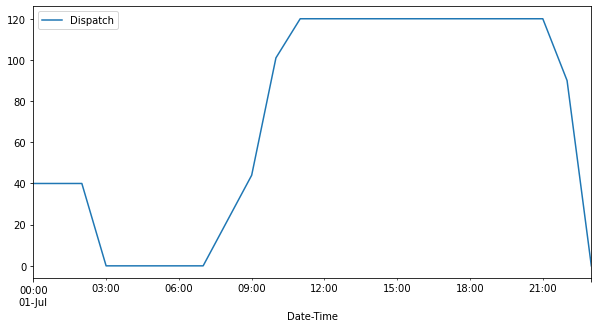

In [33]:
#plot Dispatch against time in the Canyon Plant (1st of july)
df2Copy=df2Copy.set_index('Date-Time') #set index column as the time column....
df2Copy.plot(figsize=(10,5))

In [35]:
#df2Copy=df2Copy.set_index('Date-Time')

In [36]:
df2Copy.head()

,Dispatch
Date-Time,
2020-07-01 00:00:00,40.0
2020-07-01 01:00:00,40.0
2020-07-01 02:00:00,40.0
2020-07-01 03:00:00,0.0
2020-07-01 04:00:00,0.0


In [ ]:
#df2Copy.plot(figsize=(12,6))

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#res = seasonal_decompose(df2Copy['Dispatch'])   #Error occured!!it's needed 48 observations(but here only have 24 observations)
#res.plot();

In [38]:
len(df2Copy)

24

In [39]:
train = df2Copy.iloc[:20] 
test = df2Copy.iloc[20:]

In [ ]:
#train

In [40]:
#convert the dataset into 0-1 scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
print(df2Copy.head())
print(df2Copy.tail())

                     Dispatch
Date-Time                    
2020-07-01 00:00:00      40.0
2020-07-01 01:00:00      40.0
2020-07-01 02:00:00      40.0
2020-07-01 03:00:00       0.0
2020-07-01 04:00:00       0.0
                     Dispatch
Date-Time                    
2020-07-01 19:00:00     120.0
2020-07-01 20:00:00     120.0
2020-07-01 21:00:00     120.0
2020-07-01 22:00:00      90.0
2020-07-01 23:00:00       0.0


In [42]:
#scaling the dispatch values....
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [43]:
scaled_train[:10]

array([[0.33333333],
       [0.33333333],
       [0.33333333],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18333333],
       [0.36666667]])

In [44]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [45]:
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model #Error occured...................
#model = Sequential()
#model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features))) #with 100 neurons....
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')

In [47]:
df2Copy.head()

,Dispatch
Date-Time,
2020-07-01 00:00:00,40.0
2020-07-01 01:00:00,40.0
2020-07-01 02:00:00,40.0
2020-07-01 03:00:00,0.0
2020-07-01 04:00:00,0.0


<AxesSubplot:xlabel='Date-Time'>

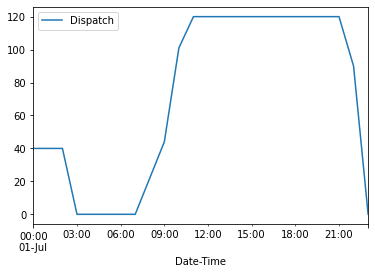

In [48]:
df2Copy.plot()

In [49]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [50]:
test_result=adfuller(df2Copy['Dispatch'])

In [51]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(dispatch):
    result=adfuller(dispatch)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [52]:
adfuller_test(df2Copy['Dispatch'])

ADF Test Statistic : -1.4738768399842597
p-value : 0.5463922533085422
#Lags Used : 1
Number of Observations Used : 22
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [53]:
len(data_frames_1)

30

In [54]:
data_frames_1_Copy=data_frames_1.copy() #used..

In [56]:
data_frames_1_copy=data_frames_1.copy() #new

In [57]:
#for canyon..
from datetime import datetime
canyon=[]
for i in range(5,30):
    data_frames_1_copy[i]=data_frames_1_copy[i].drop('Date',axis=1)
    x=data_frames_1_copy[i].iloc[0,:]
    x=x.drop('Power_Plant')
    df1 = x.to_frame().reset_index()  
    df1=df1.rename(columns = {'index':'Time',1:'Dispatch'}) #renaming...
    date=data_frames_2[i].iloc[0,3] #get the date
    df1['date']=date
    df1['date'] = df1['date'].astype("string") #change the data type
    df1['Date-Time']=df1['date'] + ' ' + df1['Time'] #combine date and the time..
    #df1['Date-Time'] = pd.to_datetime(df1['Date-Time'])
    df1['Date-Time'] = df1['Date-Time'].astype('datetime64[ns]')
    df2=df1[['Date-Time','Dispatch']] #select only needed columns.
    #df2['Dispatch'] = df1['Dispatch'].astype("float")  #change the data type
    #pd.to_datetime(df2['Date-Time'])
    #print(df2.dtypes)
    canyon.append(df2)
    
    

In [59]:
#merge all the dataframes(all days for canyon start from 7th july)
from functools import reduce
df_merged_1 = reduce(lambda  left,right: pd.merge(left,right,how='outer'), canyon)
df_merged_1.shape

(600, 2)

In [61]:
df_merged_1.head(50)

,Date-Time,Dispatch
0,2020-07-07 00:00:00,0.0
1,2020-07-07 01:00:00,0.0
2,2020-07-07 02:00:00,0.0
3,2020-07-07 03:00:00,0.0
4,2020-07-07 04:00:00,0.0
5,2020-07-07 05:00:00,38.0
6,2020-07-07 06:00:00,110.0
7,2020-07-07 07:00:00,80.0
8,2020-07-07 08:00:00,80.0
9,2020-07-07 09:00:00,80.0


In [67]:
df_merged_1_copy1=df_merged_1.copy()

In [68]:
df_merged_1_copy1.head()

,Date-Time,Dispatch
0,2020-07-07 00:00:00,0.0
1,2020-07-07 01:00:00,0.0
2,2020-07-07 02:00:00,0.0
3,2020-07-07 03:00:00,0.0
4,2020-07-07 04:00:00,0.0


In [69]:
#plot Dispatch against time in the Canyon Plant(from 7th july to 31st july)
df_merged_1_copy1=df_merged_1_copy1.set_index('Date-Time') #set index column as the time column....

<AxesSubplot:xlabel='Date-Time'>

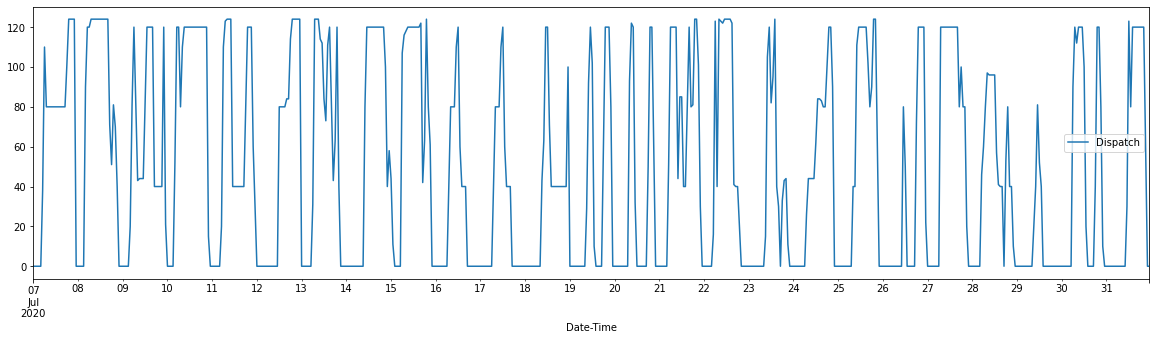

In [70]:
df_merged_1_copy.plot(figsize=(20,5))

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

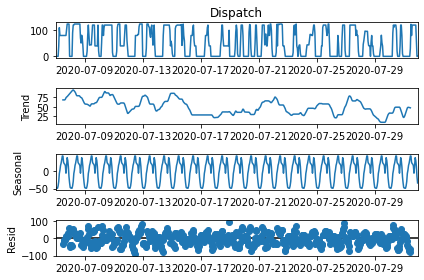

In [72]:
results = seasonal_decompose(df_merged_1_copy['Dispatch'])
results.plot();

# Testing for stationarity

In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
test_result=adfuller(df_merged_1_copy['Dispatch'])

In [75]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(dispatch):
    result=adfuller(dispatch)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [76]:
adfuller_test(df_merged_1_copy['Dispatch'])

ADF Test Statistic : -4.47611087768758
p-value : 0.00021713612527982987
#Lags Used : 19
Number of Observations Used : 580
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [83]:
#from statsmodels.tsa.arima_model import ARIMA

In [84]:
#model=ARIMA(df_merged_1_copy['Dispatch'],order=(1,1,1)) #p,d and q values..
#model_fit=model.fit()

In [85]:
import statsmodels.api as sm

In [95]:
df_merged_1_copy['Dispatch'].head()

Date-Time
2020-07-07 00:00:00    0.0
2020-07-07 01:00:00    0.0
2020-07-07 02:00:00    0.0
2020-07-07 03:00:00    0.0
2020-07-07 04:00:00    0.0
Name: Dispatch, dtype: object

In [96]:
df_merged_1_copy['Dispatch']=df_merged_1_copy['Dispatch'].astype(float) #convert to float(because there was an error occured when using the datatype as object)

In [97]:
df_merged_1_copy['Dispatch'].head()

Date-Time
2020-07-07 00:00:00    0.0
2020-07-07 01:00:00    0.0
2020-07-07 02:00:00    0.0
2020-07-07 03:00:00    0.0
2020-07-07 04:00:00    0.0
Name: Dispatch, dtype: float64

In [98]:
model=sm.tsa.statespace.SARIMAX(df_merged_1_copy['Dispatch'],order=(1, 1, 0),seasonal_order=(1,1,0,24))
results=model.fit()

C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date-Time'>

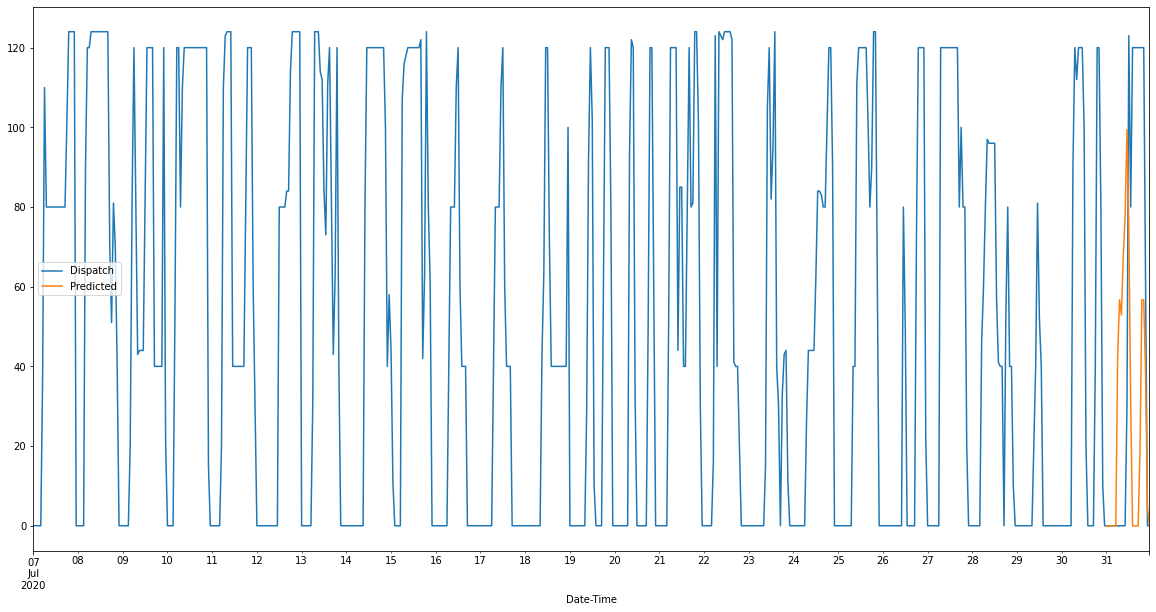

In [104]:
df_merged_1_copy['Predicted']=results.predict(start=576,end=600,dynamic=True) #predict vs real last 24 hours of canyon plant dispatch
df_merged_1_copy[['Dispatch','Predicted']].plot(figsize=(20,10))  #plotting the output

In [99]:
df_merged_1_copy['Dispatch'].shape

(600,)

In [106]:
#df_merged_1_copy['Predicted']=results.predict(start=601,end=624,dynamic=True) #predict next 24 hours of canyon plant dispatch
#df_merged_1_copy[['Dispatch','Predicted']].plot(figsize=(20,10))  #plotting the output

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
#make the next 24 hours..
datetime=[]
for i in range(24):
    datetime.append('2020-08-01'+' '+)
    
    

In [114]:

import datetime as dt
t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
datetime=[]
for i in range (24):
    datetime.append(t1)
    t2 = dt.datetime.strptime('01:00:00', '%H:%M:%S') #make to hourly....
    time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    x=(t1 - time_zero + t2).time()
    t1 = dt.datetime.strptime(str(x), '%H:%M:%S')

In [124]:
#print(datetime[0].time())
Time=[]
for i in range(24):
    Time.append(datetime[i].time())

In [127]:
D='2020-08-01'
Date=[]
for i in range(24):
    Date.append(D)
    

In [130]:
dftemp = pd.DataFrame({'Date':Date,'Time':Time}) #make empty dataframe...
dftemp

,Date,Time
0,2020-08-01,00:00:00
1,2020-08-01,01:00:00
2,2020-08-01,02:00:00
3,2020-08-01,03:00:00
4,2020-08-01,04:00:00
5,2020-08-01,05:00:00
6,2020-08-01,06:00:00
7,2020-08-01,07:00:00
8,2020-08-01,08:00:00
9,2020-08-01,09:00:00


In [134]:
#dftemp.dtypes
dftemp['Date'] = dftemp['Date'].astype("string") #change the data type
dftemp['Time'] = dftemp['Time'].astype("string") #change the data type
dftemp.dtypes

Date    string
Time    string
dtype: object

In [135]:
dftemp['Date-Time']=dftemp['Date'] + ' ' + dftemp['Time'] #combine date and the time..
dftemp

,Date,Time,Date-Time
0,2020-08-01,00:00:00,2020-08-01 00:00:00
1,2020-08-01,01:00:00,2020-08-01 01:00:00
2,2020-08-01,02:00:00,2020-08-01 02:00:00
3,2020-08-01,03:00:00,2020-08-01 03:00:00
4,2020-08-01,04:00:00,2020-08-01 04:00:00
5,2020-08-01,05:00:00,2020-08-01 05:00:00
6,2020-08-01,06:00:00,2020-08-01 06:00:00
7,2020-08-01,07:00:00,2020-08-01 07:00:00
8,2020-08-01,08:00:00,2020-08-01 08:00:00
9,2020-08-01,09:00:00,2020-08-01 09:00:00


In [136]:
dftemp['Date-Time'] = dftemp['Date-Time'].astype('datetime64[ns]')

In [137]:
dftemp.dtypes

Date                 string
Time                 string
Date-Time    datetime64[ns]
dtype: object

In [139]:
dftemp1=dftemp[['Date-Time']]
dftemp1

,Date-Time
0,2020-08-01 00:00:00
1,2020-08-01 01:00:00
2,2020-08-01 02:00:00
3,2020-08-01 03:00:00
4,2020-08-01 04:00:00
5,2020-08-01 05:00:00
6,2020-08-01 06:00:00
7,2020-08-01 07:00:00
8,2020-08-01 08:00:00
9,2020-08-01 09:00:00


In [140]:
dftemp1.dtypes

Date-Time    datetime64[ns]
dtype: object

In [144]:
df_new=dftemp1.set_index('Date-Time')

In [145]:
future_df1=pd.concat([df_merged_1_copy,df_new])

In [146]:
future_df1.head()

,Dispatch,Predicted
Date-Time,,
2020-07-07 00:00:00,0.0,NaN
2020-07-07 01:00:00,0.0,NaN
2020-07-07 02:00:00,0.0,NaN
2020-07-07 03:00:00,0.0,NaN
2020-07-07 04:00:00,0.0,NaN


<AxesSubplot:xlabel='Date-Time'>

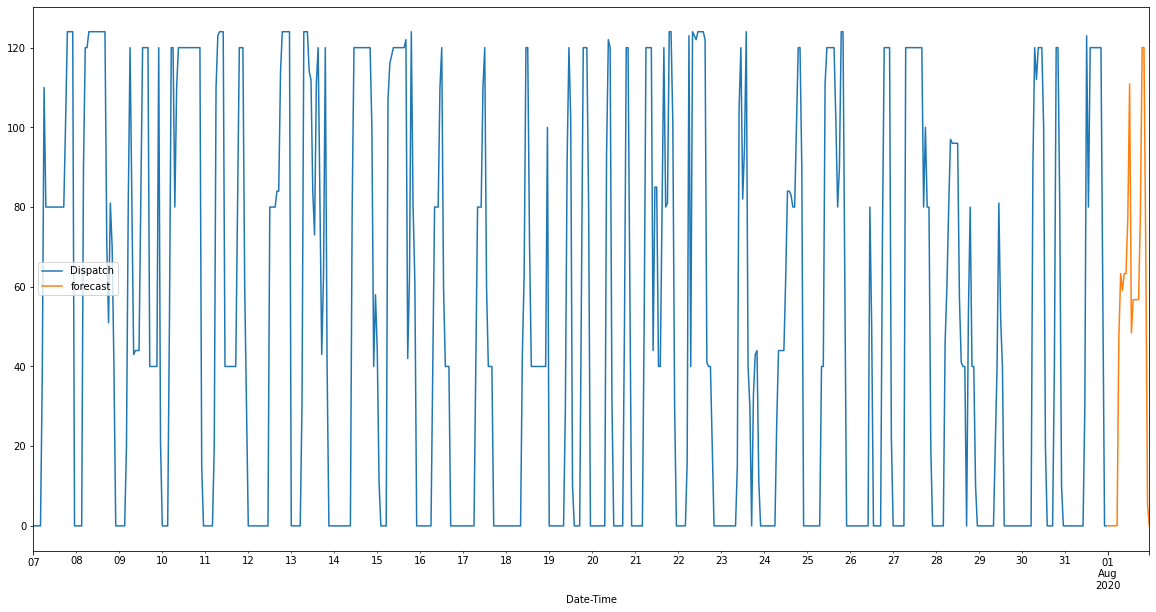

In [151]:
#plot of predicted future 24 hours.....
future_df1['forecast'] = results.predict(start=600,end=623, dynamic= True)  
future_df1[['Dispatch', 'forecast']].plot(figsize=(20, 10)) 

# Daily

In [152]:
data_frames_1[0].head()

,Power_Plant,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Date
1,Canyon,40.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,22.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,90.0,0.0,2020-07-01
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,85.0,40.0,40.0,40.0,20.0,0.0,0.0,0.0,2020-07-01
3,Olax,20.0,20.0,20.0,20.0,100.0,148.0,113.0,94.0,186.0,...,124.0,123.0,120.0,163.0,207.0,70.0,56.0,56.0,56.0,2020-07-01
4,Nlax,130.0,53.0,42.0,90.0,118.0,225.0,273.0,127.0,235.0,...,420.0,422.0,238.0,277.0,424.0,420.0,204.0,129.0,130.0,2020-07-01
5,Polp,79.0,77.0,90.0,88.0,85.0,152.0,309.0,143.0,95.0,...,203.0,263.0,320.0,239.0,360.0,319.0,192.0,91.0,83.0,2020-07-01


In [155]:
#for the Nlax plant...
v=data_frames_1[0].iloc[3,1] #value for 00:00:00 time...
d=data_frames_1[0].iloc[0,-1] #date
print(v,d)

130.0 2020-07-01


In [157]:
datesD=[]
dispatchesD=[]
for i in range(5,30):
    v=data_frames_1[i].iloc[3,1] #value
    d=data_frames_1[i].iloc[0,-1] #date
    datesD.append(d)
    dispatchesD.append(v)


In [158]:
datesD

[datetime.date(2020, 7, 7),
 datetime.date(2020, 7, 8),
 datetime.date(2020, 7, 9),
 datetime.date(2020, 7, 10),
 datetime.date(2020, 7, 11),
 datetime.date(2020, 7, 12),
 datetime.date(2020, 7, 13),
 datetime.date(2020, 7, 14),
 datetime.date(2020, 7, 15),
 datetime.date(2020, 7, 16),
 datetime.date(2020, 7, 17),
 datetime.date(2020, 7, 18),
 datetime.date(2020, 7, 19),
 datetime.date(2020, 7, 20),
 datetime.date(2020, 7, 21),
 datetime.date(2020, 7, 22),
 datetime.date(2020, 7, 23),
 datetime.date(2020, 7, 24),
 datetime.date(2020, 7, 25),
 datetime.date(2020, 7, 26),
 datetime.date(2020, 7, 27),
 datetime.date(2020, 7, 28),
 datetime.date(2020, 7, 29),
 datetime.date(2020, 7, 30),
 datetime.date(2020, 7, 31)]

In [159]:
dispatchesD

[83.0,
 180.0,
 132.0,
 105.0,
 71.0,
 158.0,
 76.0,
 60.0,
 81.0,
 77.0,
 77.0,
 83.0,
 80.0,
 81.0,
 81.0,
 87.0,
 74.0,
 48.0,
 102.0,
 44.0,
 77.0,
 57.0,
 127.0,
 75.0,
 60.0]

In [161]:
dfD = pd.DataFrame({'Date':datesD,'Dispatch':dispatchesD}) #make empty dataframe...
dfD

,Date,Dispatch
0,2020-07-07,83.0
1,2020-07-08,180.0
2,2020-07-09,132.0
3,2020-07-10,105.0
4,2020-07-11,71.0
5,2020-07-12,158.0
6,2020-07-13,76.0
7,2020-07-14,60.0
8,2020-07-15,81.0
9,2020-07-16,77.0


In [162]:
dfD.dtypes

Date         object
Dispatch    float64
dtype: object

In [163]:
dfD['Date'] = dfD['Date'].astype('datetime64[ns]')

In [164]:
dfD.dtypes

Date        datetime64[ns]
Dispatch           float64
dtype: object

In [165]:
dfD.head()

,Date,Dispatch
0,2020-07-07,83.0
1,2020-07-08,180.0
2,2020-07-09,132.0
3,2020-07-10,105.0
4,2020-07-11,71.0


In [166]:
dfD=dfD.set_index('Date')

In [167]:
dfD.head()

,Dispatch
Date,
2020-07-07,83.0
2020-07-08,180.0
2020-07-09,132.0
2020-07-10,105.0
2020-07-11,71.0


In [179]:
dateNew=['2020-08-01','2020-08-02']

In [180]:
dfDnew=pd.DataFrame({'Date':dateNew})

In [181]:
dfDnew.head()

,Date
0,2020-08-01
1,2020-08-02


In [182]:
dfDnew.dtypes

Date    object
dtype: object

In [183]:
dfDnew['Date'] = dfDnew['Date'].astype("string") #change the data type

In [184]:
dfDnew['Date'] = dfDnew['Date'].astype('datetime64[ns]')

In [185]:
dfDnew.dtypes

Date    datetime64[ns]
dtype: object

In [186]:
dfDnew=dfDnew.set_index('Date')

In [187]:
dfDnew.head()

""
Date
2020-08-01
2020-08-02


In [188]:
future_df2=pd.concat([dfD,dfDnew])

In [204]:
model1=sm.tsa.statespace.SARIMAX(dfD['Dispatch'],order=(1, 1, 1),seasonal_order=(1,1,1,2)) #0 or 1
results1=model1.fit()

C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

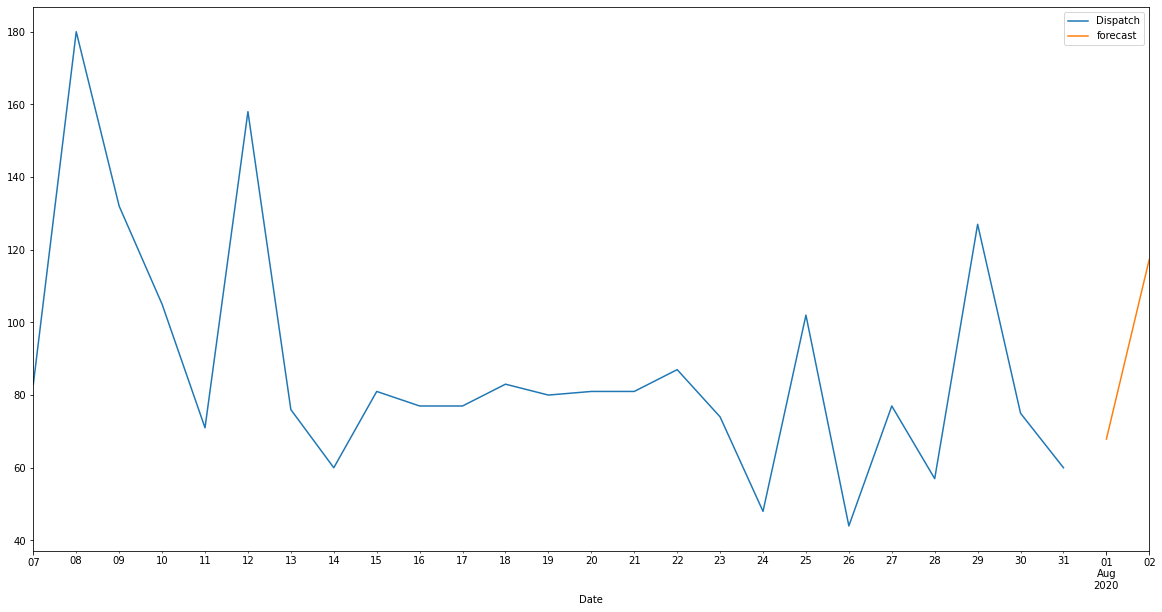

In [205]:
#plot of predicted 1st and 2nd of August.....
future_df2['forecast'] = results1.predict(start=25,end=26, dynamic= True)  
future_df2[['Dispatch', 'forecast']].plot(figsize=(20, 10)) 

In [206]:
future_df2.tail() #looking for predicted values...

,Dispatch,forecast
Date,,
2020-07-29,127.0,NaN
2020-07-30,75.0,NaN
2020-07-31,60.0,NaN
2020-08-01,NaN,67.898320
2020-08-02,NaN,117.418919
